In [2]:
from networkx import *
import pandas as pd

#i'm using IMDB data dumps available at https://www.imdb.com/interfaces/
df2 = pd.read_csv('name.basics.tsv.gz', compression='gzip', header=0, sep='\t', quotechar='\"', error_bad_lines=False)
df = pd.read_csv('title.principals.tsv.gz', compression='gzip', header=0, sep='\t', quotechar='\"', error_bad_lines=False)
df = df.head(10000)

In [3]:
df

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Herself""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N
5,tt0000003,1,nm0721526,director,\N,\N
6,tt0000003,2,nm5442194,producer,producer,\N
7,tt0000003,3,nm1335271,composer,\N,\N
8,tt0000003,4,nm5442200,editor,\N,\N
9,tt0000004,1,nm0721526,director,\N,\N


In [42]:
def name(name_id):
    return df2[df2['nconst'] == name_id]['primaryName']

In [14]:
#name("nm0583645")


In [8]:
G=nx.Graph()
    
tconst = ""
crew = []

#Assigning a weight to each relationship, the more important or more power-related it has the relationship the bigger.
for row in df.iterrows():
    if str(tconst) == row[1]['tconst']:
        if len(crew) > 0:
            #print(\"enter2\"+str(len(crew)))
            for actor in crew:
                if(row[1]['category'] == 'director'):
                    G.add_edge(row[1]['nconst'], actor, weight=5)
                elif (row[1]['category'] == 'writer'):
                    G.add_edge(row[1]['nconst'], actor, weight=4)
                elif(row[1]['category'] == 'cinematographer'):
                    G.add_edge(row[1]['nconst'], actor, weight=3)
                elif(row[1]['category'] == 'producer'):
                    G.add_edge(row[1]['nconst'], actor, weight=2)
                elif (row[1]['category'] == 'composer'):
                    G.add_edge(row[1]['nconst'], actor, weight=2)
                else:
                    G.add_edge(row[1]['nconst'], actor, weight=1)
#                G.add_edge(row[1]['nconst'], actor)
            crew.append(row[1]['nconst'])
    else:
        crew = []
        crew.append(row[1]['nconst'])
        tconst = row[1]['tconst']

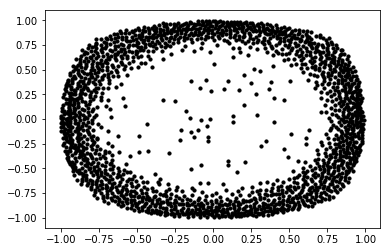

In [10]:
print(G)
pos=nx.spring_layout(G,k=1,iterations=20)

nx.draw_networkx_nodes(G,pos,node_size=10, node_color="black")

In [11]:
#some of the analysis done in the first exercise, show us the 4 is the number of average distance in this actor ecosystem
pathlengths=[]

for v in G.nodes():
    spl=single_source_shortest_path_length(G,v)
    for p in spl.values():
        pathlengths.append(p)

print("average shortest path length %s" % (sum(pathlengths)/len(pathlengths)))
dist={}
for p in pathlengths:
    if p in dist:
        dist[p]+=1
    else:
        dist[p]=1

print('')
print("length #paths")
verts=dist.keys()
for d in sorted(verts):
    print('%s %d' % (d,dist[d]))

print("density: %s" % density(G))
print("betweenness centrality: %s" % betweenness_centrality(G))

average shortest path length 4

length #paths
0 1959
1 26328
2 202546
3 587568
4 782100
5 552926
6 323138
7 159522
8 46362
9 10992
10 4398
11 190
12 108
density: 0.00686389681004
betweenness centrality: {'nm0583645': 2.9750722433139635e-05, 'nm0328322': 0.0, 'nm0152323': 8.541618122827442e-05, 'nm1263982': 5.631140559837613e-06, 'nm0085865': 0.03718427031608575, 'nm1714653': 0.0, 'nm5231591': 0.0, 'nm0272889': 1.0737197327541414e-06, 'nm0171586': 0.0, 'nm0375568': 0.0, 'nm0005736': 0.0, 'nm0403151': 8.672305071120652e-06, 'nm1860567': 0.0, 'nm0123540': 0.0, 'nm0198154': 0.0, 'nm4824599': 0.0, 'nm0036298': 2.609735461555204e-07, 'nm1857036': 0.0, 'nm0518711': 0.0, 'nm0703545': 0.0, 'nm0216066': 0.0, 'nm0421443': 0.0, 'nm0290066': 2.7749237526796278e-05, 'nm0386036': 0.0, 'nm1838546': 0.0, 'nm0609678': 0.0, 'nm6010696': 0.0, 'nm0453315': 0.0, 'nm0891119': 0.0, 'nm5228466': 0.0, 'nm0930788': 4.837392300200208e-06, 'nm0714557': 0.0, 'nm0366586': 0.0, 'nm0906610': 0.0, 'nm0084830': 0.002507

In [25]:
def island(g, weight=1):
    g2 = nx.Graph()
    for edge in list(g.edges(data='weight')):
        if weight >= edge[2]:
           g2.add_edge(edge[0], edge[1], weight=edge[2]) 
    return g2    
        
g2 = island(G, 3)
pathlengths=[]

for v in g2.nodes():
    spl=single_source_shortest_path_length(g2,v)
    for p in spl.values():
        pathlengths.append(p)

print("average shortest path length %s" % (sum(pathlengths)/len(pathlengths)))
dist={}
for p in pathlengths:
    if p in dist:
        dist[p]+=1
    else:
        dist[p]=1

print('')
print("length #paths")
verts=dist.keys()
for d in sorted(verts):
    print('%s %d' % (d,dist[d]))

print("density: %s" % density(g2))
print("betweenness centrality: %s" % betweenness_centrality(g2))

average shortest path length 5

length #paths
0 1841
1 19396
2 126958
3 275568
4 404264
5 378520
6 311340
7 215686
8 127992
9 62686
10 23690
11 8286
12 2248
13 540
14 102
15 10
density: 0.00572585787497
betweenness centrality: {'nm0328322': 5.713565185868187e-06, 'nm0152323': 0.000223519509711828, 'nm1263982': 3.3161544904973998e-06, 'nm0085865': 0.0022517871711704818, 'nm0626131': 0.0, 'nm5231591': 0.0, 'nm0272889': 1.3495835007998992e-06, 'nm0171586': 0.0, 'nm0375568': 0.0, 'nm0005736': 1.7731754025108165e-06, 'nm0894523': 1.0047993947561294e-05, 'nm0403151': 6.737530708688069e-05, 'nm1860567': 1.4776461687590138e-07, 'nm0123540': 0.0, 'nm0198154': 0.0, 'nm4824599': 0.0, 'nm1160705': 0.0, 'nm0518711': 0.0, 'nm0703545': 0.0, 'nm0216066': 0.006218315223637626, 'nm0421443': 0.0, 'nm0290066': 0.00010901795852439851, 'nm0386036': 0.0, 'nm1838546': 0.0, 'nm0609678': 0.0, 'nm6010696': 0.0023203637660954104, 'nm0453315': 0.0, 'nm0891119': 0.0, 'nm5228466': 0.0, 'nm0930788': 7.68046014371855e

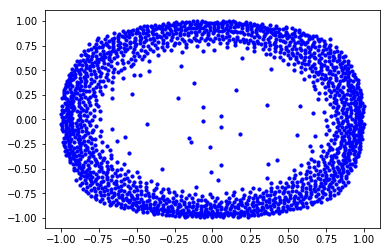

In [26]:
pos=nx.spring_layout(g2,k=1,iterations=20)

nx.draw_networkx_nodes(g2,pos,node_size=10, node_color="blue")

## conclusions

It seems there's not much of a difference if we cut actors of the equation, but after reducing lower weight edges, the distance between people in the network augments a little bit.

inspired a bit in the 'Oracle of Bacon' project, where the author establish the distance between an actor and Kevin Bacon. 